Purpose of the Code

The goal of this code is to visualize relationships between different attributes using correlation heatmaps. It is organized into three main sections:

1) Overall Correlation Analysis
Examines the correlations across the entire dataset to identify general patterns and relationships among all variables.

2) Incident-Type–Specific Correlation Analysis
Calculates and visualizes correlations separately for each incident type to see how relationships between attributes vary across different categories of incidents.

3) Line-Specific Correlation Analysis
Computes and visualizes correlations for each transit line individually to understand attribute relationships within specific lines.

In [1]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import excel

cleaned_df = pd.read_excel('ttc-streetcar-delay-data-2024_cleaned.xlsx', index_col=None, header=0)
cleaned_df.head()

,Date,Line,Time,Day,Location,Incident,Min Delay,Min Gap,Bound,Vehicle,Month,Week,Day of Month,Hour of Day,Season
0,2024-04-28,301,03:54,Sunday,WOLSELEY LOOP,Cleaning - Unsanitary,30,60,E,8118,4,18,28,3,Spring
1,2024-09-14,301,02:23,Saturday,WOLSELEY LOOP,Utilized Off Route,30,60,W,8112,9,37,14,2,Summer
2,2024-01-28,301,02:11,Sunday,WARDEN AND COMSTOCK,Mechanical,10,20,W,8734,1,5,28,2,Winter
3,2024-11-15,301,02:35,Friday,THE QUEENSWAY AND WIND,Security,24,39,W,4588,11,46,15,2,Fall
4,2024-08-25,301,03:11,Sunday,THE QUEENSWAY AND GLEN,Mechanical,10,30,E,4569,8,35,25,3,Summer


In [ ]:
# Explore attributes 

cleaned_df.columns.tolist()
for col in cleaned_df.columns:
    print(f"\n=== {col} ===")
    uniques = cleaned_df[col].unique()
    if len(uniques) > 20:
        print(f"{len(uniques)} unique values. First 20 shown:")
        print(uniques[:20])
    else:
        print(uniques)


=== Date ===
366 unique values. First 20 shown:
<DatetimeArray>
['2024-04-28 00:00:00', '2024-09-14 00:00:00', '2024-01-28 00:00:00',
 '2024-11-15 00:00:00', '2024-08-25 00:00:00', '2024-05-15 00:00:00',
 '2024-07-03 00:00:00', '2024-11-09 00:00:00', '2024-11-13 00:00:00',
 '2024-11-14 00:00:00', '2024-10-03 00:00:00', '2024-10-27 00:00:00',
 '2024-07-18 00:00:00', '2024-11-24 00:00:00', '2024-02-04 00:00:00',
 '2024-02-02 00:00:00', '2024-01-01 00:00:00', '2024-09-06 00:00:00',
 '2024-12-12 00:00:00', '2024-11-08 00:00:00']
Length: 20, dtype: datetime64[ns]

=== Line ===
[301 303 304 305 306 310 312 501 503 504 505 506 507 508 509 510 511 512]

=== Time ===
1438 unique values. First 20 shown:
['03:54' '02:23' '02:11' '02:35' '03:11' '02:42' '03:49' '06:51' '05:35'
 '04:00' '02:39' '03:00' '03:10' '02:22' '01:48' '04:56' '07:44' '04:27'
 '03:52' '03:41']

=== Day ===
['Sunday' 'Saturday' 'Friday' 'Wednesday' 'Thursday' 'Monday' 'Tuesday']

=== Location ===
1573 unique values. First 20

For only numerical cariables cor plot looks like this 

In [ ]:
# Identify number of unique values

cleaned_df.nunique()

Date             366
Line              18
Time            1438
Day                7
Location        1572
Incident          13
Min Delay        227
Min Gap          238
Bound              4
Vehicle         1151
Month             12
Week              53
Day of Month      31
Hour of Day       24
Season             4
dtype: int64

## 1) Overall Correlation Analysis

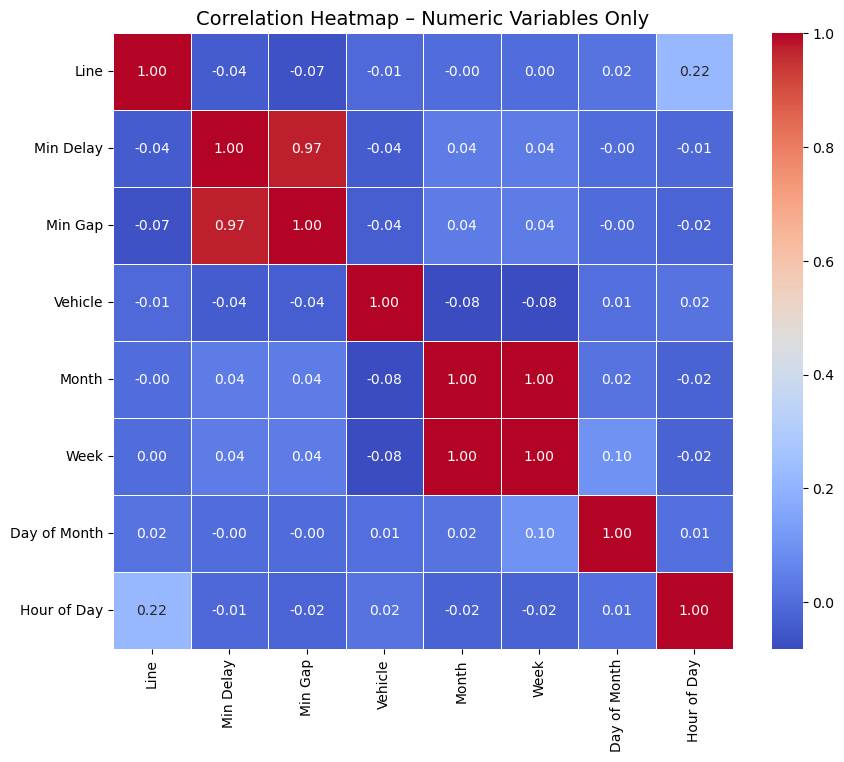

In [9]:
# Compute correlations only for numeric columns
corr = cleaned_df.select_dtypes(include='number').corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap – Numeric Variables Only", fontsize=14)
plt.show()

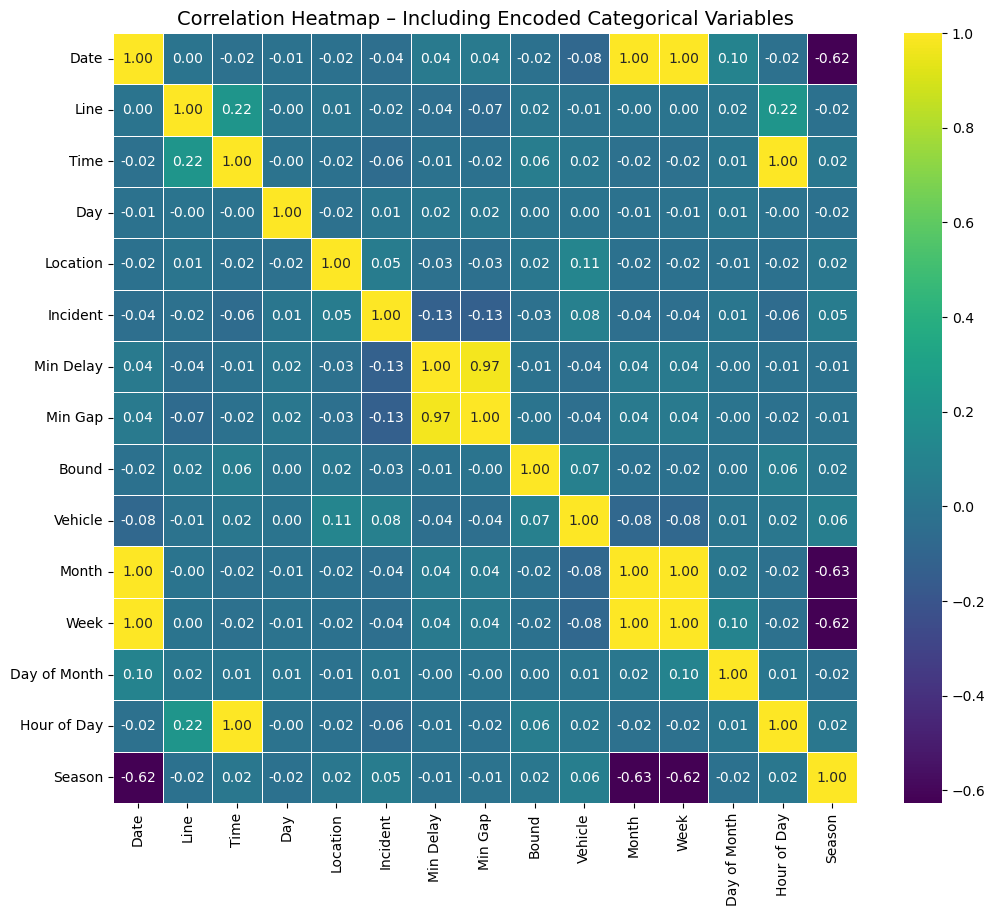

In [ ]:
# Compute correlations only for numeric and string columns by converting them to categorical variables
encoded_df = cleaned_df.copy()

# Convert object columns to categorical codes
for col in encoded_df.select_dtypes('object').columns:
    encoded_df[col] = encoded_df[col].astype('category').cat.codes

corr = encoded_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap – Including Encoded Categorical Variables", fontsize=14)
plt.show()

## 2) Incident-Type–Specific Correlation Analysis

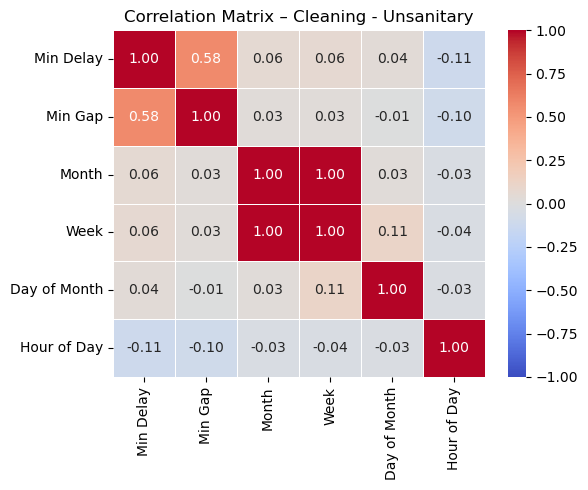

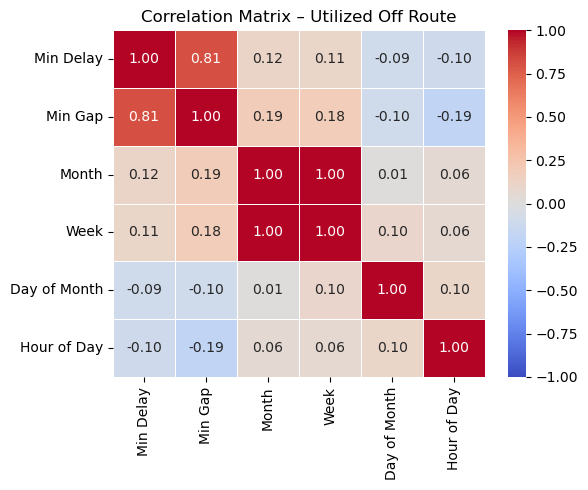

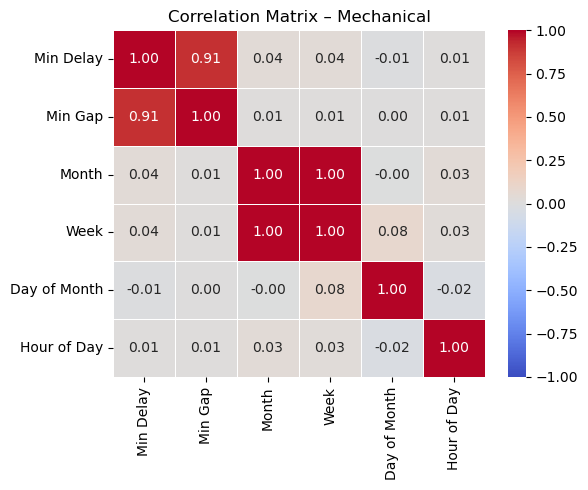

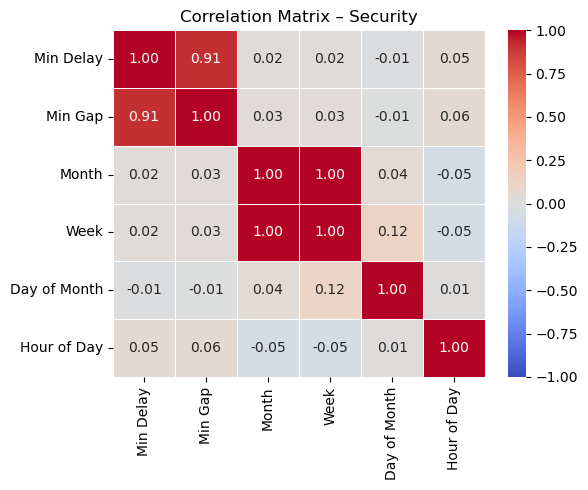

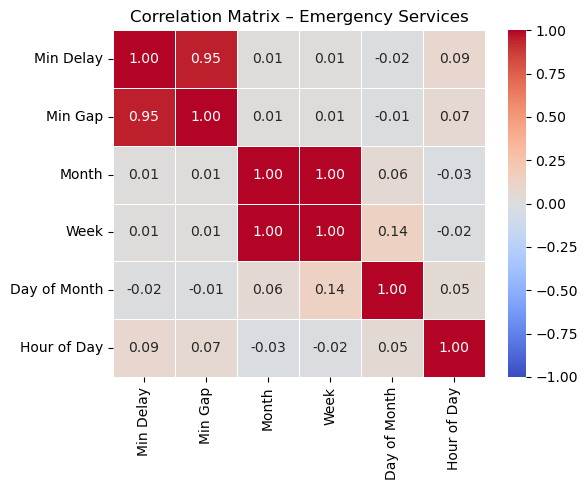

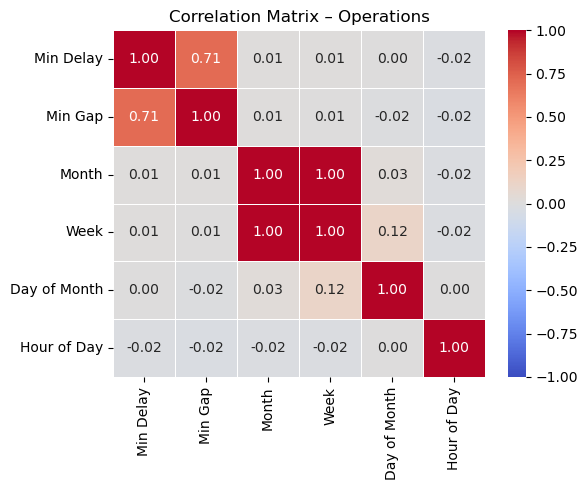

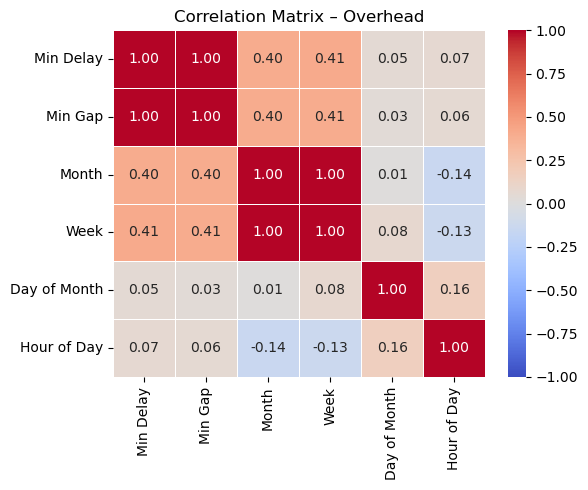

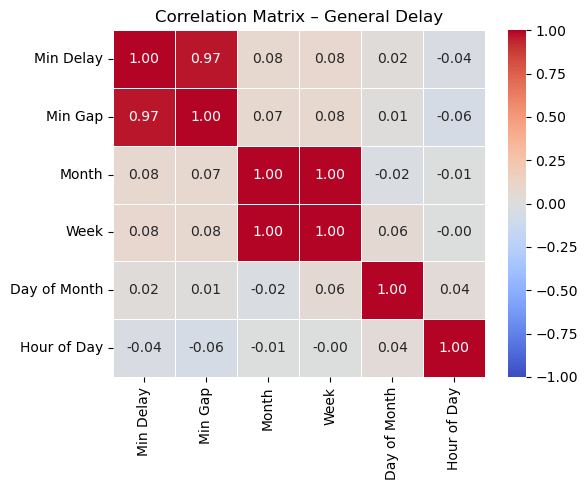

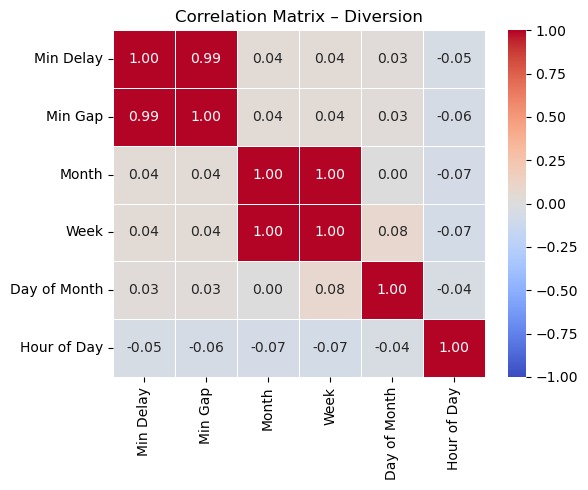

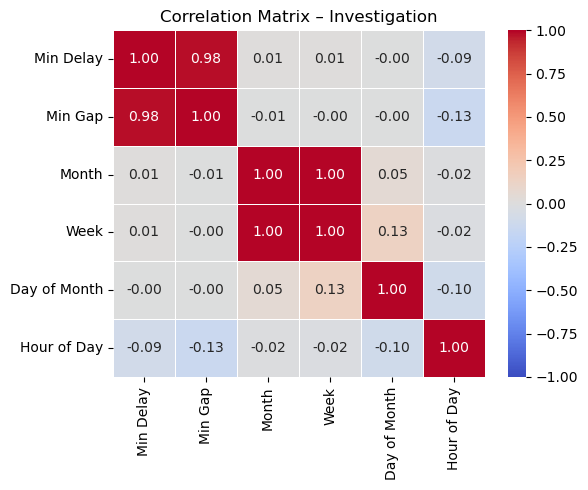

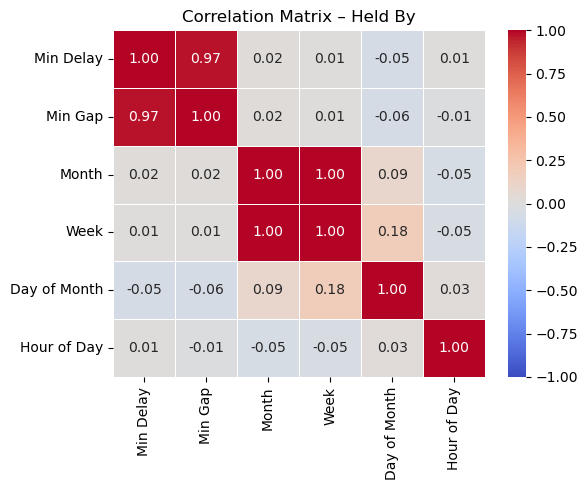

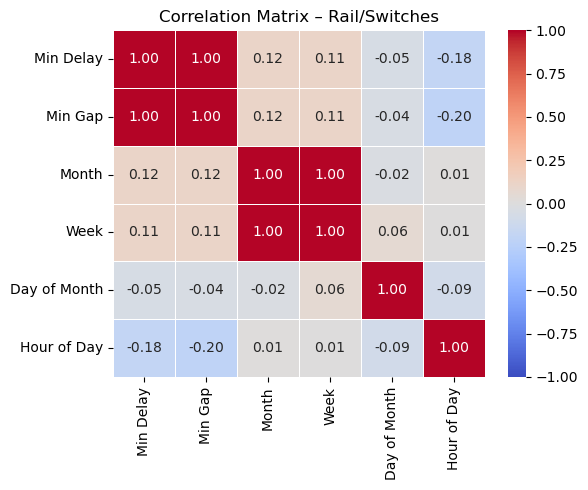

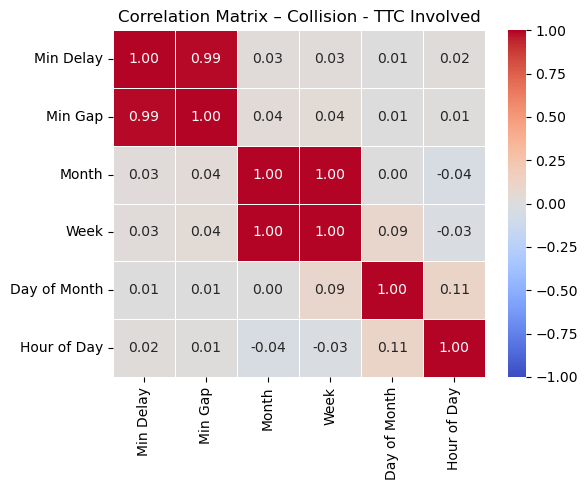

In [21]:
num_cols = ['Min Delay', 'Min Gap', 'Month', 'Week', 'Day of Month', 'Hour of Day']

# Unique incident types
incidents = cleaned_df['Incident'].unique()

for inc in incidents:
    subset = cleaned_df[cleaned_df['Incident'] == inc]
    corr = subset[num_cols].corr()

    plt.figure(figsize=(6, 5))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, linewidths=0.5)
    plt.title(f"Correlation Matrix – {inc}", fontsize=12)
    plt.tight_layout()
    plt.show()

## 3) Line-Specific Correlation Analysis

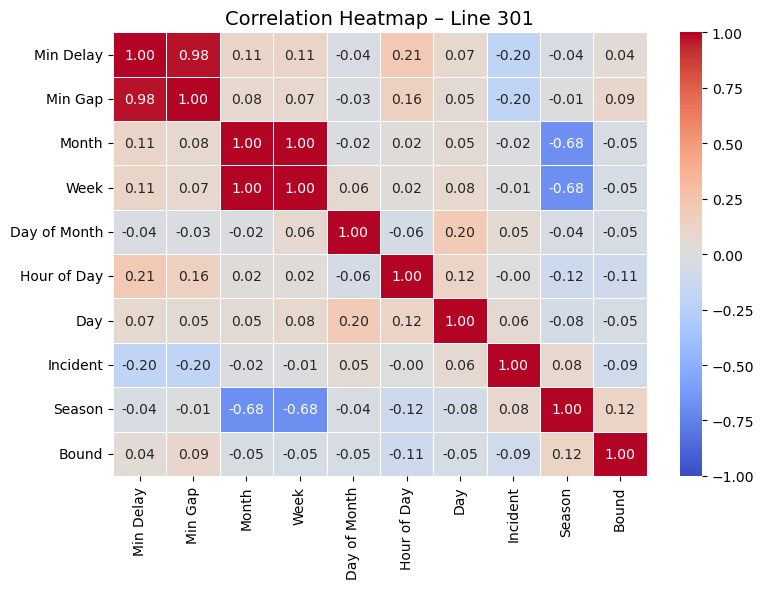

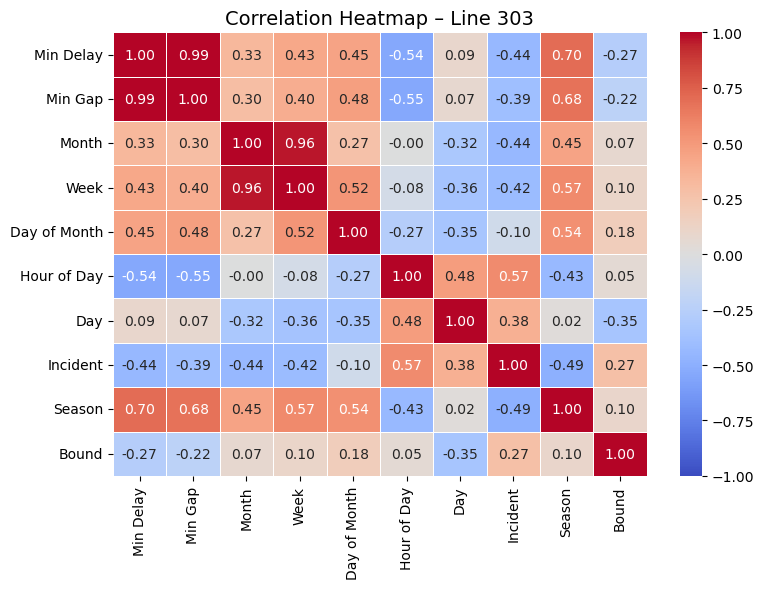

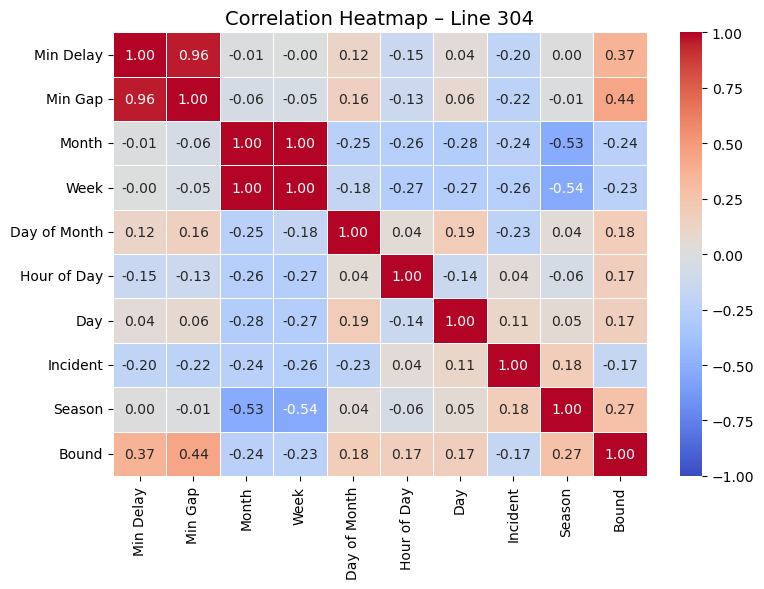

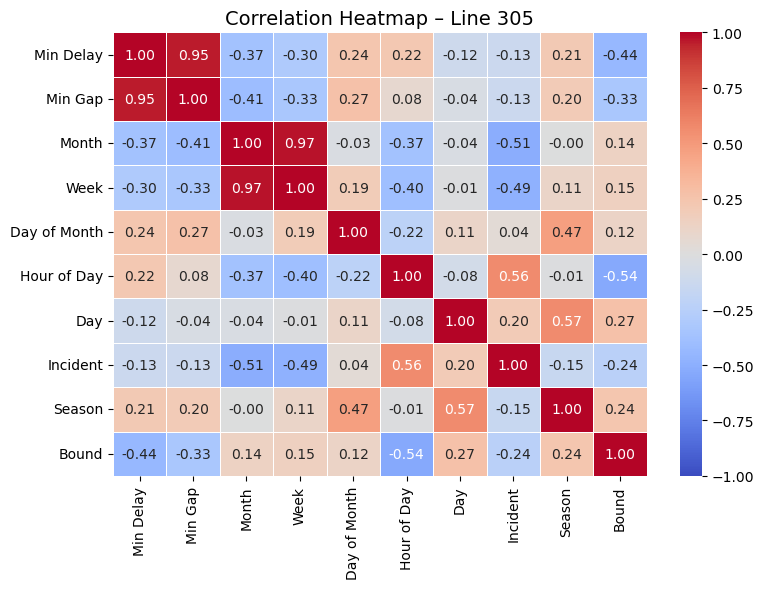

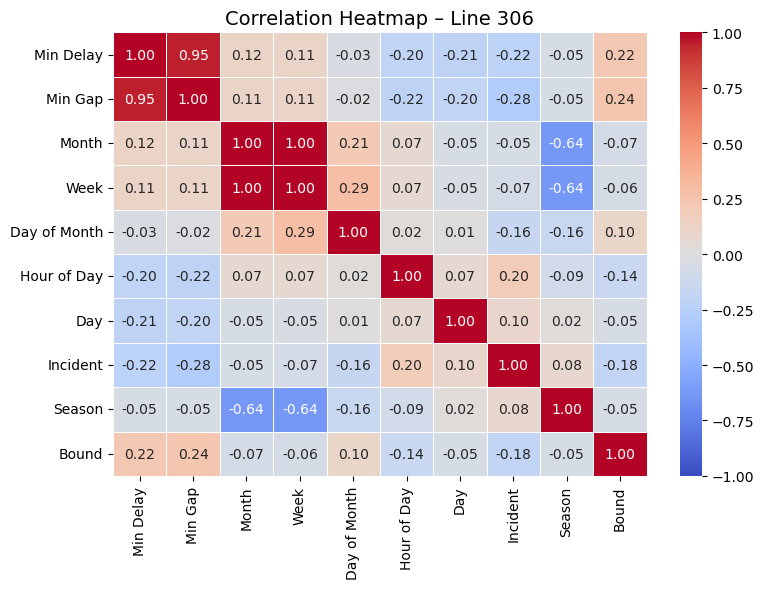

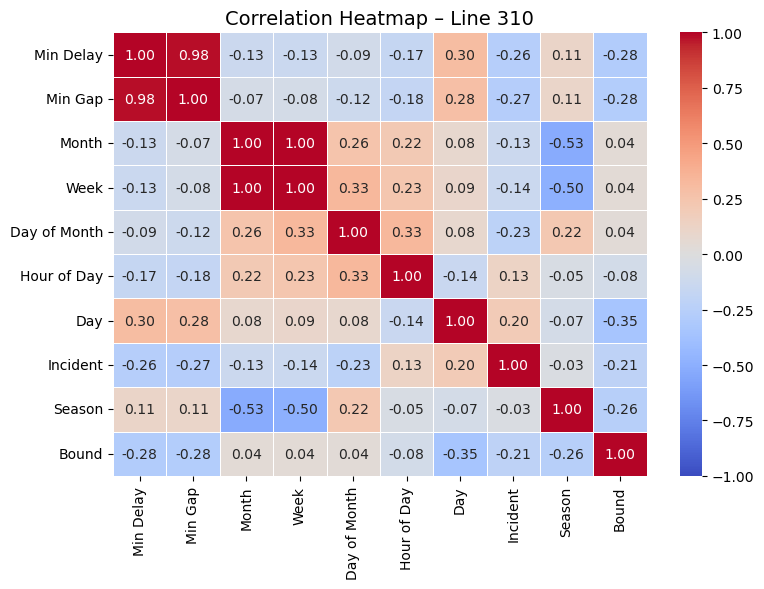

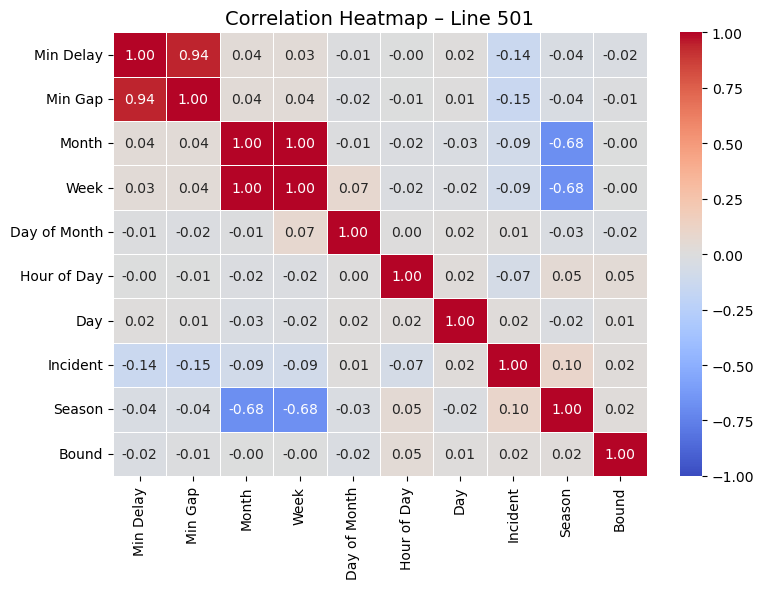

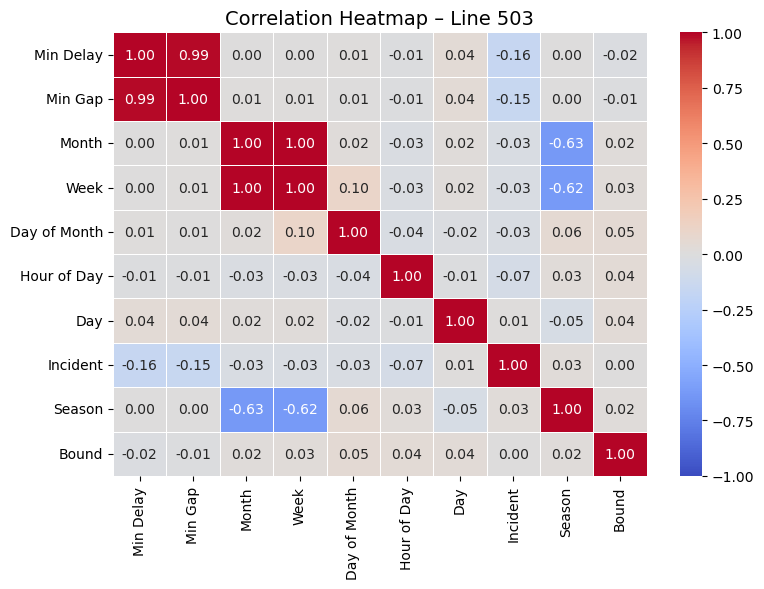

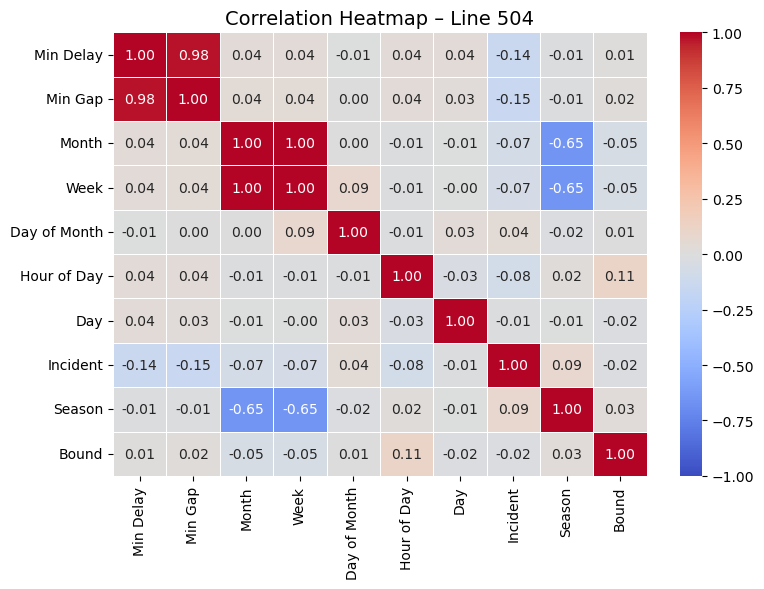

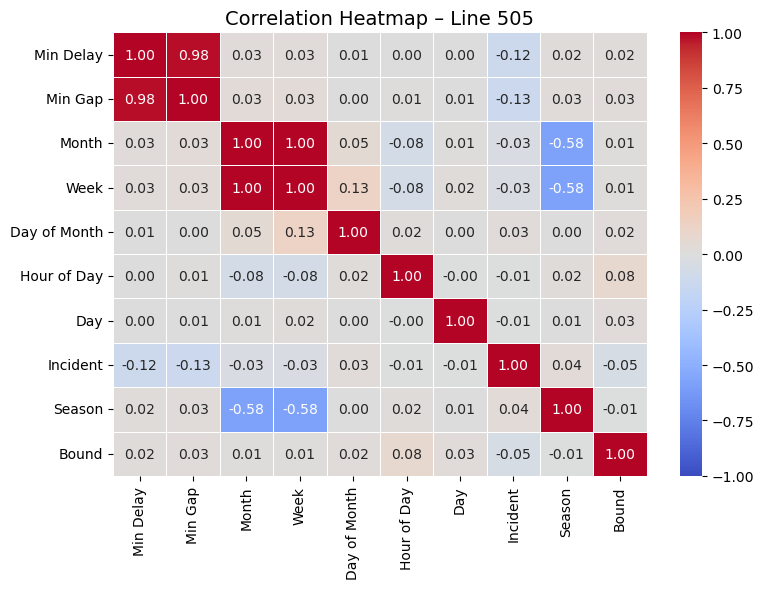

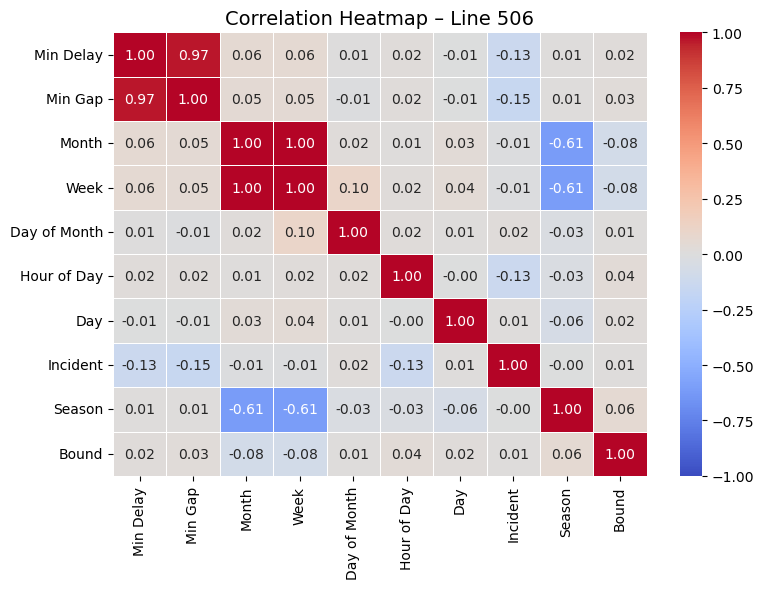

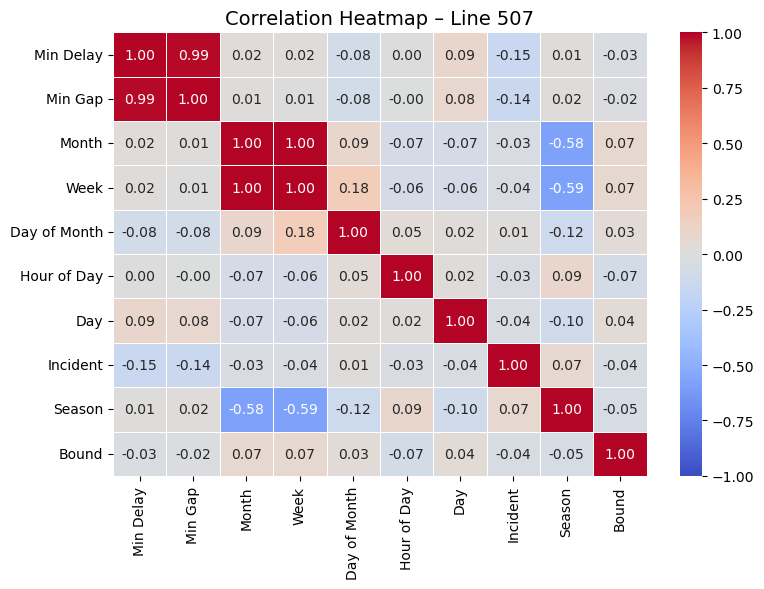

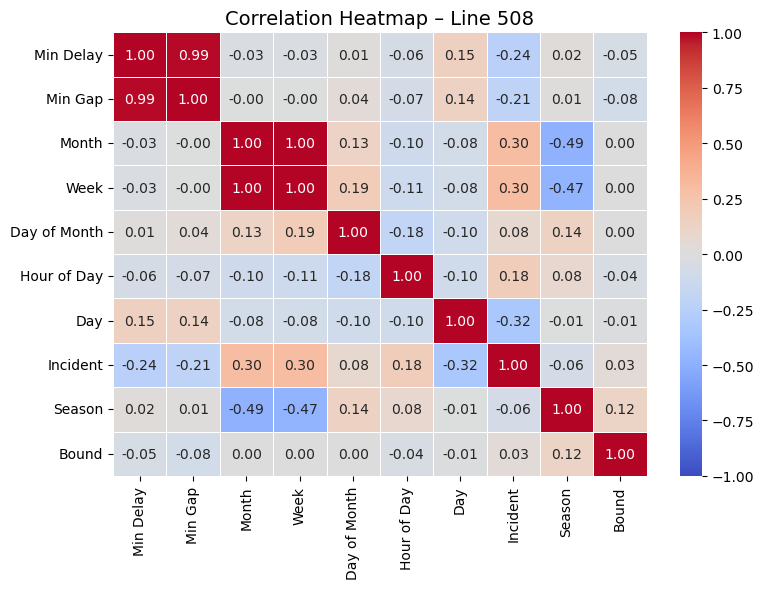

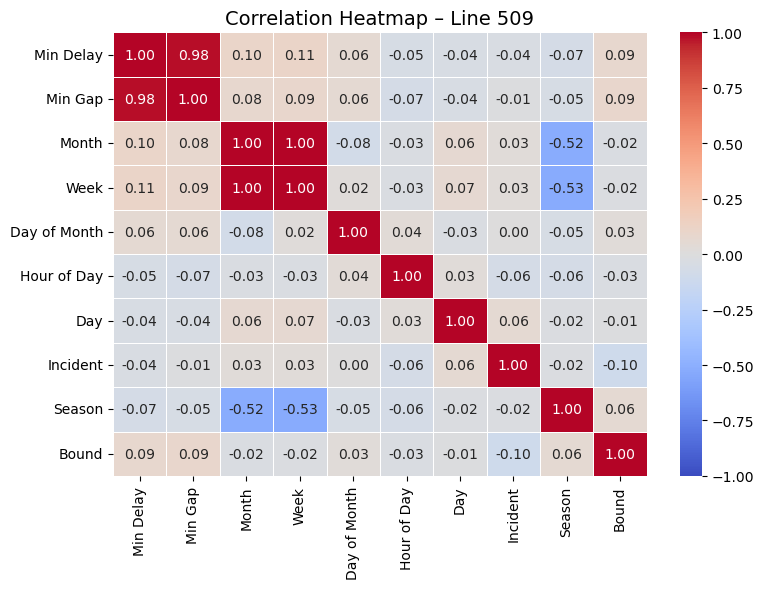

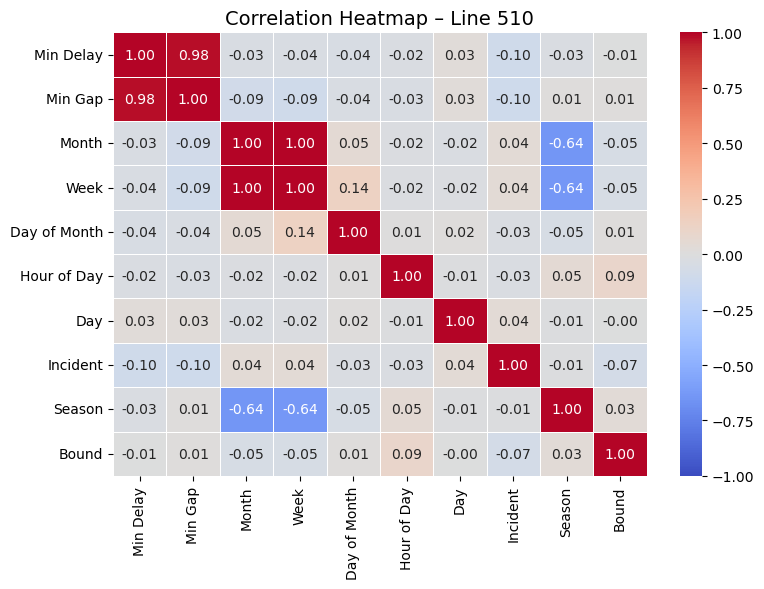

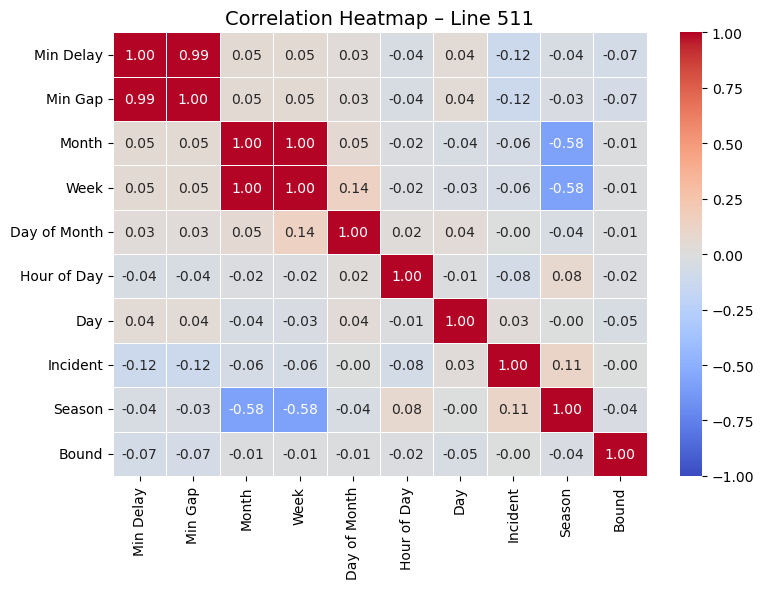

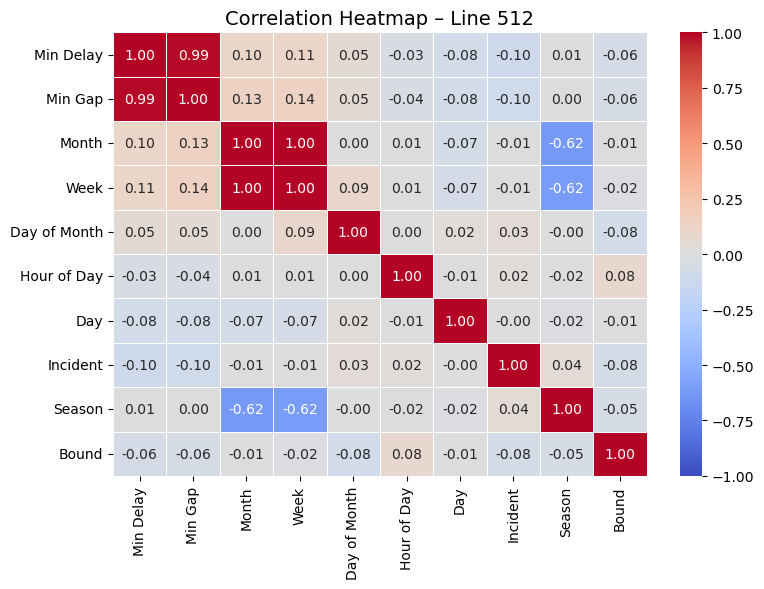

In [14]:
lines = sorted(cleaned_df['Line'].unique())

for line in lines:
    subset = cleaned_df[cleaned_df['Line'] == line].copy()
    
    # Skip if not enough data
    if subset.shape[0] < 10:
        continue
    
    # Encode categorical columns
    for col in cat_cols:
        subset[col] = subset[col].astype('category').cat.codes
    
    corr = subset[cols_for_corr].corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        corr,
        annot=True,
        cmap='coolwarm',
        fmt=".2f",
        linewidths=0.5,
        vmin=-1, vmax=1
    )
    plt.title(f"Correlation Heatmap – Line {line}", fontsize=14)
    plt.tight_layout()
    plt.show()


FINDINGS:

 - There is a strong correlation between Min Delay and Min Gap
 - Month, Week and Season show corrraltion too
 - Explorataion of spereate lines and incidents present the same findings. 
 - Some of the night shifts (308, 312) show stornger correlation with time variables most likely due to limitation in their shifts. 
